# Programación Python para Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 4
<p>Selección de caractarísticas.</p>
    

<hr style="border-color:red">

In [1]:
# Generales 
from pandas import read_csv, DataFrame, concat
# import numpy as np
import matplotlib.pyplot as plt

# Seleccion de caracteristicas
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

Cargar el Dataset "*Chess (King-Rook vs. King-Pawn)*" del repositorio UCI Machine Learning y desarrollar los siguientes puntos:
- Transforma las variables, que son todas categóricas, en numéricas.
- Aplica el método Filter de selección de características SelectKBest para conseguir un ranking de importancia de características según los estadísticos pertinentes al tipo de variable de entrada y tipo de problema.
- Realiza un gráfico de barras con la importancia de cada característica para cada uno de los estadísticos utilizados. ¿Coinciden las tres características más importantes en todos los casos?.

***Fuente:*** *https://archive-beta.ics.uci.edu/ml/datasets/chess+king+rook+vs+king+pawn*

In [2]:
names=['bkblk','bknwy','bkon8','bkona','bkspr','bkxbq','bkxcr','bkxwp','blxwp','bxqsq','cntxt','dsopp',
       'dwipd','hdchk','katri','mulch','qxmsq','r2ar8','reskd','reskr','rimmx','rkxwp','rxmsq','simpl',
       'skach','skewr','skrxp','spcop','stlmt','thrsk','wkcti','wkna8','wknck','wkovl','wkpos','wtoeg','white result']

# Carga del dataset
df=read_csv('kr-vs-kp.data', names=names)

# Representación de los datos
df

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,white result
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3192,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3193,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3194,t,f,t,f,f,f,t,f,f,f,...,f,t,f,f,t,f,f,f,n,nowin


<div style="font-size:14px; text-align:justify"><b>1: </b>Transforma las variables, que son todas categóricas, en numéricas.</div>

In [3]:
# Información acerca del total de valores que adquiere cada atributo.
df.nunique()

bkblk           2
bknwy           2
bkon8           2
bkona           2
bkspr           2
bkxbq           2
bkxcr           2
bkxwp           2
blxwp           2
bxqsq           2
cntxt           2
dsopp           2
dwipd           2
hdchk           2
katri           3
mulch           2
qxmsq           2
r2ar8           2
reskd           2
reskr           2
rimmx           2
rkxwp           2
rxmsq           2
simpl           2
skach           2
skewr           2
skrxp           2
spcop           2
stlmt           2
thrsk           2
wkcti           2
wkna8           2
wknck           2
wkovl           2
wkpos           2
wtoeg           2
white result    2
dtype: int64

In [4]:
# Separación en datos de entrada y salida del dataframe
X=df[df.columns[:-1]]
y=df[df.columns[-1:]]

display(X, y)

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,t,t,n
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,f,t,t,n
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,f,t,t,n
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,f,t,t,n
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,t,t,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,t,f,f,f,f,f,t,f,f,f,...,f,f,t,f,f,t,f,t,f,n
3192,t,f,f,f,f,f,t,f,f,f,...,f,f,t,f,f,t,f,t,f,n
3193,t,f,f,f,f,f,t,f,f,f,...,f,f,t,f,f,t,f,t,f,n
3194,t,f,t,f,f,f,t,f,f,f,...,f,f,t,f,f,t,f,f,f,n


,white result
0,won
1,won
2,won
3,won
4,won
...,...
3191,nowin
3192,nowin
3193,nowin
3194,nowin


In [5]:
# Previo a la transformación, separar el conjunto en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
display(X_train, y_train)

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg
647,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,t,t,t
2907,t,f,t,f,f,t,f,f,f,f,...,t,f,f,f,t,f,t,f,t,n
1359,f,f,f,f,t,t,t,t,t,t,...,f,f,f,f,f,f,t,t,t,n
1689,t,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,f,f,t,t,n
1113,f,f,f,f,t,t,t,t,t,f,...,f,f,f,f,f,f,t,t,t,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,t,t,n
1130,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,t,n
1294,f,f,f,f,t,f,t,t,t,t,...,f,f,f,f,f,f,f,f,t,n
860,f,f,f,f,t,t,f,f,f,t,...,f,f,f,f,f,f,f,t,t,n


,white result
647,won
2907,nowin
1359,nowin
1689,won
1113,nowin
...,...
1095,nowin
1130,nowin
1294,nowin
860,won


In [6]:
# Creamos  una instancia de OneHotEncoder con los paramteros pertinentes
ohe=OneHotEncoder()

# Transformación de las variables categóricas con la instancia OHE
ohe.fit(X_train)
X_trs=ohe.transform(X_train).toarray()

# Muestra de los datos transformados
names=ohe.get_feature_names_out()
X_trs=DataFrame(X_trs, columns=names)
X_trs

,bkblk_f,bkblk_t,bknwy_f,bknwy_t,bkon8_f,bkon8_t,bkona_f,bkona_t,bkspr_f,bkspr_t,...,wkna8_f,wkna8_t,wknck_f,wknck_t,wkovl_f,wkovl_t,wkpos_f,wkpos_t,wtoeg_n,wtoeg_t
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2137,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2138,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2139,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


Al convertir en valores numéricos cada uno de los atributos, se obtiene un total de 73 columnas, esto se debe a que en cada columnma categórica existe 2 únicos valores, por lo tanto, se duplica todas las columnas como se puede apreciar.

<div style="font-size:14px; text-align:justify"><b>2: </b>Aplica el método Filter de selección de características SelectKBest para conseguir un ranking de importancia de características según los estadísticos pertinentes al tipo de variable de entrada y tipo de problema.</div>

Tras la transformación de los valores categóricos en numéricos y con la variable a predecir categórica, los estadísticos que se puede emplear para este problema son los siguientes:
- Coeficiente de correlación ANOVA (Lineal)
- Coeficiente de ranking de Kendall (No Lineal)

In [7]:
# Instancia de SelectKBest con la función ANOVA (f_classif)
# k: Numero de instancias a seleccionar. Como las columnas están duplicadas, se selecciona las 10 mejores
#     de modo que finalmente se obtenga los cinco mejores parámetros.
filterKB = SelectKBest(score_func=f_classif, k=10)

# Ejecutar la función y obtener los mejores atributos
filter_model = filterKB.fit(X_trs, y_train['white result'])

# Crear X con los parámetros escogidos
# columns=filter_model.get_support(indices=True)
columns_names=filter_model.get_feature_names_out()
data=filter_model.transform(X_trs)

X_filter=DataFrame(data=data, columns=columns_names)

# Muestra de resultados

print('Resultados obtenidos por atributo:\n', filter_model.scores_, '\n')
print('Dataframe con K mejores:\n')
display(X_filter)


Resultados obtenidos por atributo:
 [8.82382704e-02 8.82382704e-02 1.96965124e-01 1.96965124e-01
 1.76832525e+01 1.76832525e+01 1.66236848e-02 1.66236848e-02
 7.98553495e-01 7.98553495e-01 4.03657501e+01 4.03657501e+01
 6.75399186e+01 6.75399186e+01 1.28874245e+02 1.28874245e+02
 1.36346938e+01 1.36346938e+01 3.87960019e+02 3.87960019e+02
 8.20739492e+00 8.20739492e+00 1.35537235e-02 1.35537235e-02
 1.81376644e+01 1.81376644e+01 1.20044927e+01 1.20044927e+01
 1.84719841e+01 2.76059378e+01 8.79949520e+01 4.99540547e+01
 4.99540547e+01 3.62814496e-01 3.62814496e-01 5.35647369e+01
 5.35647369e+01 2.34990466e+00 2.34990466e+00 6.84517182e-01
 6.84517182e-01 5.75297992e+02 5.75297992e+02 3.09490076e+01
 3.09490076e+01 1.70352921e+01 1.70352921e+01 8.26809199e+00
 8.26809199e+00 6.04651511e+00 6.04651511e+00 7.25262933e+00
 7.25262933e+00 3.56806302e+01 3.56806302e+01            nan
 4.02765402e+01 4.02765402e+01 5.73441017e+00 5.73441017e+00
 3.68781463e+01 3.68781463e+01 9.71534405e+01 9.7

c:\python3_8_5\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [55] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\python3_8_5\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,bkxwp_f,bkxwp_t,bxqsq_f,bxqsq_t,rimmx_f,rimmx_t,wkna8_f,wkna8_t,wknck_f,wknck_t
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2136,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2137,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2138,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2139,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


Dado que los atributos han sido duplicados a la hora de realizar el OHE, con el resultado de los mejores atributos, se ha de tener en cuenta de escoger todos aquellos desdobles para cada atributo. En este caso, vemos que los 10 mejores han sido los mismos cinco atributos por lo que no hay que añadir ninguna columna más faltante. Recordemos que por cada atributo existe dos valores únicos.

<div style="font-size:14px; text-align:justify"><b>3: </b>Realiza un gráfico de barras con la importancia de cada característica para cada uno de los estadísticos utilizados. ¿Coinciden las tres características más importantes en todos los casos?</div>

Representación de la selección de caracteristicas por el estadistico **ANOVA** para los casos de predicción categórica y variables de entrada numéricas.<br>
Representación de la selección de caracteristicas por el estadístico **Chi-Cuadrado** e **Información mutua** para los casos de predicción categórica y variables de estrada categóricas.

In [8]:
from sklearn.feature_selection import chi2,  mutual_info_classif

<div style="font-size:14px; text-align:center"><b>ANOVA</b><br></div>

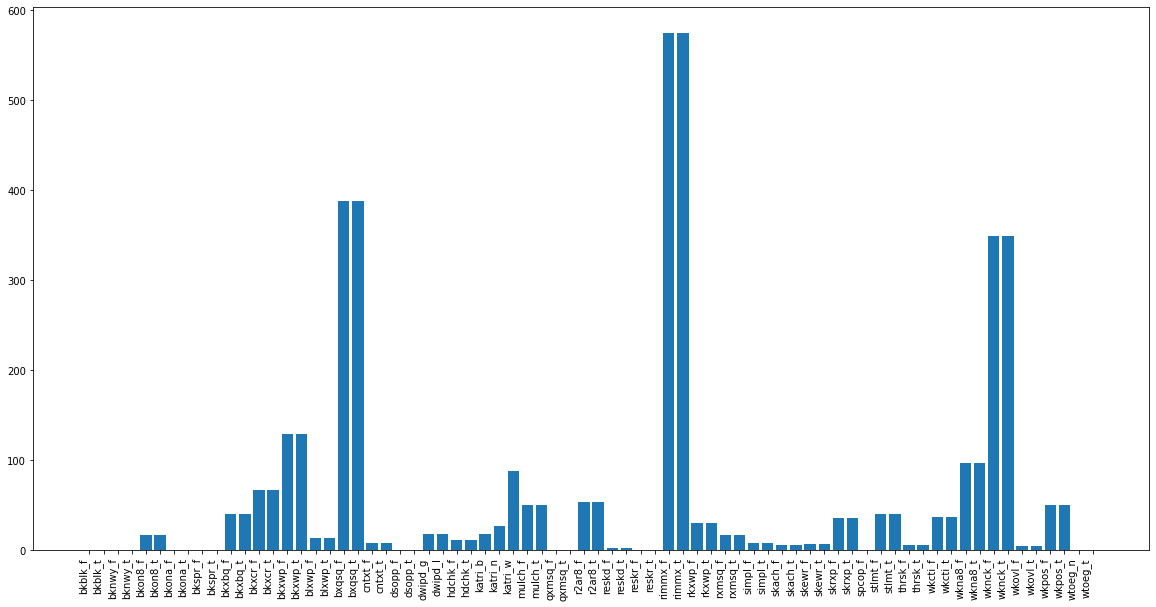

In [9]:
# Resultados obtenidos en el metodo Filter
anova_results=filter_model.scores_

# Ploteo de los resultados
fig, ax = plt.subplots(figsize=[20,10])
plt.xticks(rotation=90, ha='right')
plt.bar(X_trs.columns, anova_results)
plt.show()

<div style="font-size:14px; text-align:center"><b>CHI-CUADRADO</b><br></div>

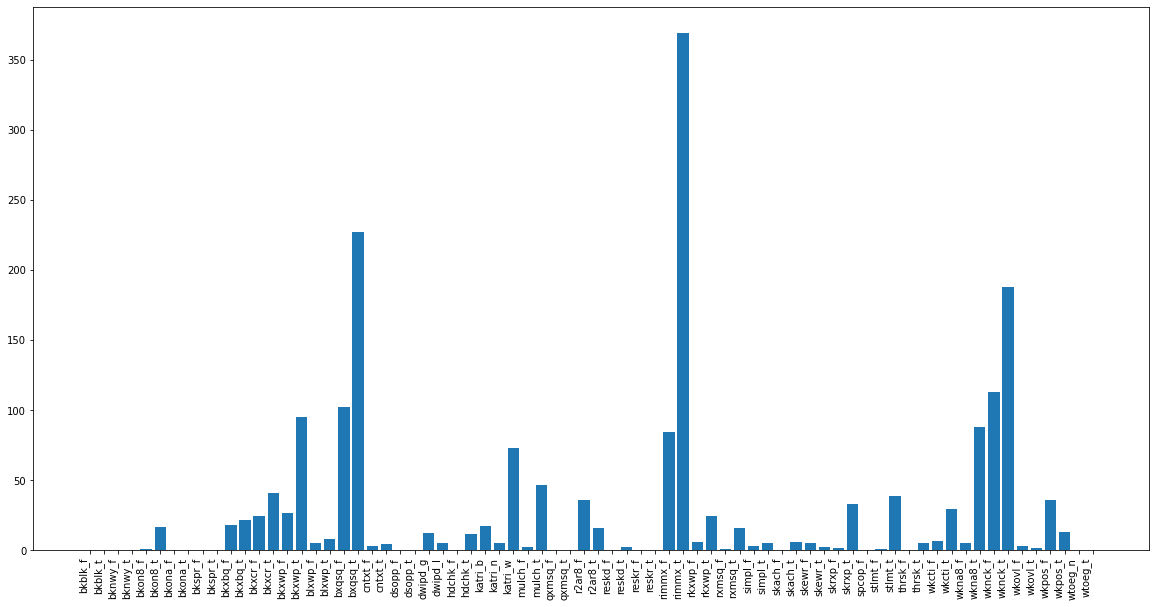

In [10]:
# Instancia de SelectKBest con funcion CHI-Cuadrado
# k: Numero de instancias a seleccionar. Como las columnas están duplicadas, se selecciona las 10 mejores
#     de modo que finalmente se obtenga los cinco mejores parámetros.
filter_chi = SelectKBest(score_func= chi2, k=10).fit(X_trs, y_train['white result'])

# Resultados obtenidos en el metodo Filter
chi_results=filter_chi.scores_

# Ploteo de los resultados
fig, ax = plt.subplots(figsize=[20,10])
plt.xticks(rotation=90, ha='right')
plt.bar(X_trs.columns, chi_results)
plt.show()

<div style="font-size:14px; text-align:center"><b>INFORMACION MUTUA</b><br></div>

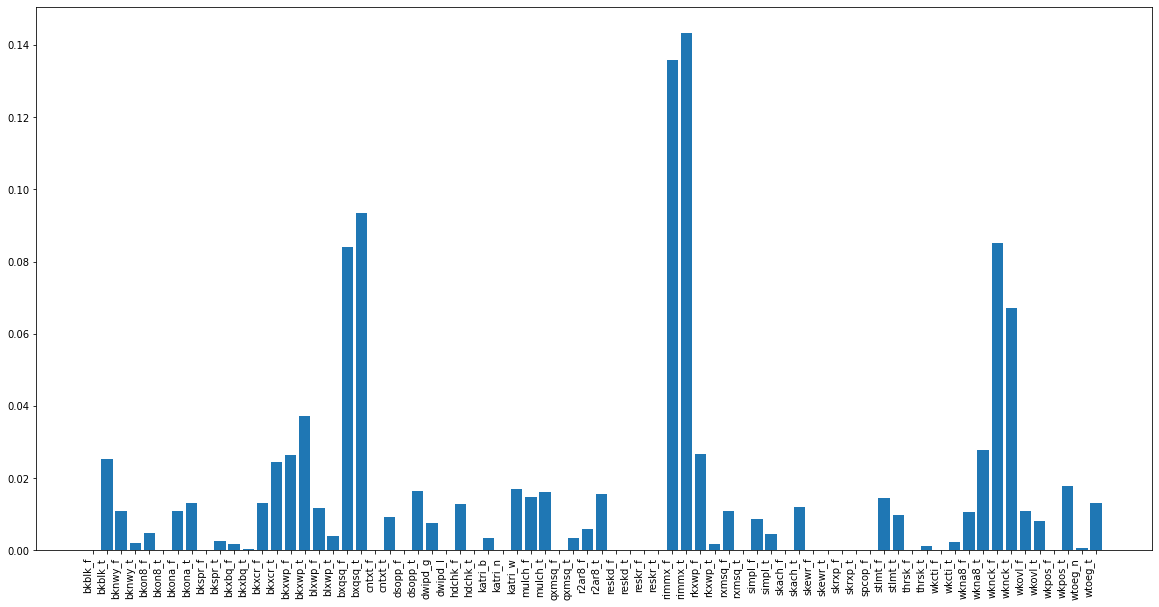

In [11]:
# Instancia de SelectKBest con funcion CHI-Cuadrado
# k: Numero de instancias a seleccionar. Como las columnas están duplicadas, se selecciona las 10 mejores
#     de modo que finalmente se obtenga los cinco mejores parámetros.
filter_mutual_info = SelectKBest(score_func= mutual_info_classif, k=10).fit(X_trs, y_train['white result'])

# Resultados obtenidos en el metodo Filter
filter_mutual_info=filter_mutual_info.scores_

# Ploteo de los resultados
fig, ax = plt.subplots(figsize=[20,10])
plt.xticks(rotation=90, ha='right')
plt.bar(X_trs.columns, filter_mutual_info)
plt.show()

Se puede observar que si se obtiene los mismos atributos como los más reevantes, aunque para el caso de CHI-CUADRADO e INFORMACION MUTUA, no se obtiene el mismo resultado para las parejas de atributos, quedando una de estas superior a la otra.